Description: Exploração dos discursos dos presidentes.

Created by: Leandro A. da Silva (leandro@kognita.com.br)

Created at: 20/6/2017

Last modification: 18/6/2018

<< Código para fins didáticos, apenas >>

#### Primeiro passo: instalar componentes da biblioteca nltk:
i) abra um terminal e execute o comando "python"

ii) importe a biblioteca nltk usando o comando "import nltk"

iii) execute "nltk.download()"

iv) uma janela se abrirá. Selecione a opção "download all" e aguarde o processo de instalação terminar (a janela não fecha sozinha, acompanhe a barra de progresso exibida.)

In [20]:
%matplotlib inline

In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import bigrams
from datetime import datetime
import itertools
from nltk.probability import DictionaryProbDist
import matplotlib.pyplot as plt
from matplotlib.cm import jet
import numpy as np
from unidecode import unidecode
from collections import Counter
from scipy import stats, polyfit, polyval
from itertools import chain
from dateutil import parser
from statsmodels.graphics.mosaicplot import mosaic
from wordcloud import WordCloud
import time
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
plt.style.use('ggplot')


#### Lendo os datasets:

In [5]:
# Cuidado: aponte o caminho para o diretório correto do seu computador,
# que deve ser o diretório dos arquivos obtidos na etapa anterior. 
# Lembrando que no Windows, a barra é invertida, e escrita como barra dupla. Ex.: 'C:\\Desktop'.
data_path = '/home/kognita/Dropbox/shared_Amanda_Kognita/handson_NLP_kognita_ufabc/part2_exploring_speeches/'

In [6]:
data_path

'/home/kognita/Dropbox/shared_Amanda_Kognita/handson_NLP_kognita_ufabc/part2_exploring_speeches/'

In [7]:
df_lula_clean = pd.read_csv(data_path + 'lula_clean.csv', sep='\t')

In [8]:
df_dilma_clean = pd.read_csv(data_path + 'dilma_clean.csv', sep='\t')

In [9]:
df_temer_clean = pd.read_csv(data_path + 'temer_clean.csv', sep='\t')

#### Em geral, antes de fazermos uma análise estatística em um dado texto, é conveniente que seja executado um procedimento de limpeza sobre o mesmo. A idéia base é remover "ruído", ou seja, strings que não são, ao menos num primeiro momento, relevantes para a transmissão da informação contida num texto. 
#### Para tal, costuma-se eliminar símbolos especiais (acentuação, pontuação etc) e as chamadas "stopwords" do texto

#### (Evidentemente, as vantagens e desvantagens desse procedimento de limpeza deve ser avaliado caso a caso de acordo com a aplicação que se tem em mãos.)

#### Por exemplo, na biblioteca "nltk" (natural language tool kit), são definidas como stopwords em inglês as strings:

In [12]:
print stopwords.words('english')

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'eac

#### Já em português, as stopwords são:

In [13]:
print stopwords.words('portuguese')

[u'de', u'a', u'o', u'que', u'e', u'do', u'da', u'em', u'um', u'para', u'com', u'n\xe3o', u'uma', u'os', u'no', u'se', u'na', u'por', u'mais', u'as', u'dos', u'como', u'mas', u'ao', u'ele', u'das', u'\xe0', u'seu', u'sua', u'ou', u'quando', u'muito', u'nos', u'j\xe1', u'eu', u'tamb\xe9m', u's\xf3', u'pelo', u'pela', u'at\xe9', u'isso', u'ela', u'entre', u'depois', u'sem', u'mesmo', u'aos', u'seus', u'quem', u'nas', u'me', u'esse', u'eles', u'voc\xea', u'essa', u'num', u'nem', u'suas', u'meu', u'\xe0s', u'minha', u'numa', u'pelos', u'elas', u'qual', u'n\xf3s', u'lhe', u'deles', u'essas', u'esses', u'pelas', u'este', u'dele', u'tu', u'te', u'voc\xeas', u'vos', u'lhes', u'meus', u'minhas', u'teu', u'tua', u'teus', u'tuas', u'nosso', u'nossa', u'nossos', u'nossas', u'dela', u'delas', u'esta', u'estes', u'estas', u'aquele', u'aquela', u'aqueles', u'aquelas', u'isto', u'aquilo', u'estou', u'est\xe1', u'estamos', u'est\xe3o', u'estive', u'esteve', u'estivemos', u'estiveram', u'estava', u'est\

#### Uma função para remover stopwords e símbolos especiais de um dado texto:

In [21]:
# a function to make a cleaning procedure in texts. Enter, for example df['text'], and get a list of clean text
def cleaning(dfcolumn):
    
    text_list_zero = dfcolumn.tolist()
    
    print ' '
    print ' '
    print 'eliminating excess of blank space: '
    print ' '
    
    text_list_one = []
    time1 = time.time()
    for k in xrange(0, len(text_list_zero)):
        test = k % 100
        if test == 0:
            print k
            
        text_list_one.append( ' '.join(text_list_zero[k].split()) )
        
    print 'step time: ', time.time() - time1
    print 'partial total time: ', time.time() - time1    
    print ' '
    print ' '

    print ' '
    print ' '
    print 'eliminating urls: '
    print ' '
    
    text_list_2 = []
    time2 = time.time()
    for k in xrange(0, len(text_list_one)):
        test = k % 100
        if test == 0:
            print k
        text = text_list_one[k]
        text_clean = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
        text_list_2.append(text_clean)
    print 'step time: ', time.time() - time2
    print 'partial total time: ', time.time() - time1
    print ' '
    print ' '
    
    
    # strings to erase:
    toerase =  ['.',',','!','?',';','@',
               '...','/','(',')','"',':',
               '=','#','-','&','|','%','*','"',"'s",'[', ']'," ' ","$"]

    
    print ' '
    print ' '
    print 'eliminating more strings... '
    print ' '    
    
    
    text_list_3 = []
    time3 = time.time()
    for k in xrange(0, len(text_list_2)):
        test = k % 100
        if test == 0:
            print k        
        text_zero = unidecode(text_list_2[k].decode('utf-8')).lower()
        vector_text = []
        temp = text_zero
        for j in xrange(0, len(toerase)):    
            temp2 = temp.replace(toerase[j],' ')
            vector_text.append(temp2)
            temp = vector_text[j]
        text_one = vector_text[-1].strip()    
        tokens = [w for w in word_tokenize(text_one) if not w in stopwords.words('portuguese')]
        text_final = ' '.join(tokens)
        text_list_3.append(text_final)
    print 'step time: ', time.time() - time3
    print 'Total time: ', time.time() - time1
    print ' '
    print ' '
    
    return text_list_3

## Temer

#### Inspecionando o dataset:

In [22]:
df_temer_clean

,title,text,president,dates
0,"Discurso do Presidente da República, Michel Te...",Eu quero cumprimentar a todos e tomarei a libe...,Temer,2017-08-09
1,"Discurso do Presidente da República, Michel Te...",Minhas primeiras palavras são de agradecimento...,Temer,2017-07-21
2,"Discurso do Presidente da República, Michel Te...","Bem, meus senhores, minhas senhoras, eu quero ...",Temer,2017-07-20
3,"Discurso do Presidente da República, Michel Te...","Senhora chanceler federal,Senhores chefes de E...",Temer,2017-07-07
4,"Discurso do Presidente da República, Michel Te...","Quero, inicialmente, cumprimentar o presidente...",Temer,2017-07-07
5,"Discurso do Presidente da República, Michel Te...","Saudar o ministro Torquato Jardim, cumprimenta...",Temer,2017-06-29
6,"Discurso do Presidente da República, Michel Te...","Muito obrigado à ministra Erna Solberg, com qu...",Temer,2017-06-23
7,Declaração à imprensa do Presidente da Repúbli...,Quero cumprimentar mais uma vez à vossa excelê...,Temer,2017-06-23
8,"Discurso do Presidente da República, Michel Te...",Eu quero inicialmente cumprimentar a todos os ...,Temer,2017-06-22
9,"Discurso do Presidente da República, Michel Te...",Agradeço enormemente a gentileza de nos recebe...,Temer,2017-06-21


#### Limpando o texto:

In [23]:
temer_clean_text_list = cleaning(df_temer_clean['text'])

 
 
eliminating excess of blank space: 
 
0
step time:  0.0063488483429
partial total time:  0.00664305686951
 
 
 
 
eliminating urls: 
 
0
step time:  0.00178408622742
partial total time:  0.00967001914978
 
 
 
 
eliminating more strings... 
 
0
step time:  9.08639812469
Total time:  9.0985019207
 
 


In [24]:
df_temer_clean['clean_text'] = temer_clean_text_list

In [25]:
df_temer_clean

,title,text,president,dates,clean_text
0,"Discurso do Presidente da República, Michel Te...",Eu quero cumprimentar a todos e tomarei a libe...,Temer,2017-08-09,quero cumprimentar todos tomarei liberdade gov...
1,"Discurso do Presidente da República, Michel Te...",Minhas primeiras palavras são de agradecimento...,Temer,2017-07-21,primeiras palavras sao agradecimento president...
2,"Discurso do Presidente da República, Michel Te...","Bem, meus senhores, minhas senhoras, eu quero ...",Temer,2017-07-20,bem senhores senhoras quero cumprimentar minis...
3,"Discurso do Presidente da República, Michel Te...","Senhora chanceler federal,Senhores chefes de E...",Temer,2017-07-07,senhora chanceler federal senhores chefes esta...
4,"Discurso do Presidente da República, Michel Te...","Quero, inicialmente, cumprimentar o presidente...",Temer,2017-07-07,quero inicialmente cumprimentar presidente xi ...
5,"Discurso do Presidente da República, Michel Te...","Saudar o ministro Torquato Jardim, cumprimenta...",Temer,2017-06-29,saudar ministro torquato jardim cumprimentar i...
6,"Discurso do Presidente da República, Michel Te...","Muito obrigado à ministra Erna Solberg, com qu...",Temer,2017-06-23,obrigado ministra erna solberg acabamos manter...
7,Declaração à imprensa do Presidente da Repúbli...,Quero cumprimentar mais uma vez à vossa excelê...,Temer,2017-06-23,quero cumprimentar vez vossa excelencia dizer ...
8,"Discurso do Presidente da República, Michel Te...",Eu quero inicialmente cumprimentar a todos os ...,Temer,2017-06-22,quero inicialmente cumprimentar todos particip...
9,"Discurso do Presidente da República, Michel Te...",Agradeço enormemente a gentileza de nos recebe...,Temer,2017-06-21,agradeco enormemente gentileza receber alias s...


#### Contando também o número de palavras na coluna "clean_text":

In [26]:
df_temer_clean['word_count'] = df_temer_clean['clean_text'].str.split().apply(len)

In [27]:
df_temer_clean

,title,text,president,dates,clean_text,word_count
0,"Discurso do Presidente da República, Michel Te...",Eu quero cumprimentar a todos e tomarei a libe...,Temer,2017-08-09,quero cumprimentar todos tomarei liberdade gov...,1137
1,"Discurso do Presidente da República, Michel Te...",Minhas primeiras palavras são de agradecimento...,Temer,2017-07-21,primeiras palavras sao agradecimento president...,722
2,"Discurso do Presidente da República, Michel Te...","Bem, meus senhores, minhas senhoras, eu quero ...",Temer,2017-07-20,bem senhores senhoras quero cumprimentar minis...,435
3,"Discurso do Presidente da República, Michel Te...","Senhora chanceler federal,Senhores chefes de E...",Temer,2017-07-07,senhora chanceler federal senhores chefes esta...,214
4,"Discurso do Presidente da República, Michel Te...","Quero, inicialmente, cumprimentar o presidente...",Temer,2017-07-07,quero inicialmente cumprimentar presidente xi ...,269
5,"Discurso do Presidente da República, Michel Te...","Saudar o ministro Torquato Jardim, cumprimenta...",Temer,2017-06-29,saudar ministro torquato jardim cumprimentar i...,460
6,"Discurso do Presidente da República, Michel Te...","Muito obrigado à ministra Erna Solberg, com qu...",Temer,2017-06-23,obrigado ministra erna solberg acabamos manter...,485
7,Declaração à imprensa do Presidente da Repúbli...,Quero cumprimentar mais uma vez à vossa excelê...,Temer,2017-06-23,quero cumprimentar vez vossa excelencia dizer ...,115
8,"Discurso do Presidente da República, Michel Te...",Eu quero inicialmente cumprimentar a todos os ...,Temer,2017-06-22,quero inicialmente cumprimentar todos particip...,868
9,"Discurso do Presidente da República, Michel Te...",Agradeço enormemente a gentileza de nos recebe...,Temer,2017-06-21,agradeco enormemente gentileza receber alias s...,426


#### checando para um caso em particular:

In [28]:

len(df_temer_clean['clean_text'][0].split())

1137

In [29]:
print df_temer_clean['clean_text'][0]

quero cumprimentar todos tomarei liberdade governador prefeito vou tomar liberdade nome ambos cumprimentar todos porque sao tantas autoridades governador dornelles prefeito crivella estao aqui mesa estao auditorio fazer longa relacao digo autoridades nao quero dizer apenas prezados colegas deputados federais estao vida publica estao vida privada voces sabem enaltecido todos momentos presenca iniciativa privada auxilio fenomeno governativo entao falo reitero autoridades referindo ocupam transitoriamente poder publico ocupam permanentemente setor privado aqui primeira afirmacao quero fazer aqui revelar importancia senhor presidente iniciativa senhores levam adiante muita exacao muita competencia portanto ajudando construir pais aqui ja mencionado ha pouco ano tracamos caminho recolocar brasil trilhos desde entao presidente joao martins vencendo problemas comprometiam presente futuro brasileiros afinal gastos desenfreados inflacao descontrolada juros alta regras irracionais desemprego ala

In [30]:
print df_temer_clean['text'][0]

Eu quero cumprimentar a todos e tomarei a liberdade de, governador e prefeito, eu vou tomar a liberdade de, em nome de ambos, eu cumprimentar a todos. Porque são tantas as autoridades, governador Dornelles, prefeito Crivella, que estão aqui à mesa e estão no auditório, que eu teria que fazer uma longa relação, e quando eu digo: autoridades, não quero dizer apenas, meus prezados colegas e deputados federais, aqueles que estão na vida pública, mas aqueles que estão na vida privada. Vocês sabem que eu tenho enaltecido, em todos os momentos, a presença da iniciativa privada no auxílio ao fenômeno do governativo. Então, quando eu falo, reitero, autoridades, estou me referindo àquelas que ocupam transitoriamente o poder público, e àquelas que ocupam permanentemente o setor privado.E nós estamos aqui, e esta é a primeira afirmação que eu quero fazer, nós estamos aqui para revelar a importância, senhor presidente, da iniciativa que os senhores levam adiante com muita exação, e com muita compet

#### Para minimizar ruído de eventuais coletas incompletas de discursos, vamos estabelecer um cutoff nos dataframes nos limitando a discursos com mais de 50 palavras:

In [31]:
df_temer_clean = df_temer_clean[df_temer_clean['word_count'] >= 50].reset_index(drop = True)

In [32]:
df_temer_clean

,title,text,president,dates,clean_text,word_count
0,"Discurso do Presidente da República, Michel Te...",Eu quero cumprimentar a todos e tomarei a libe...,Temer,2017-08-09,quero cumprimentar todos tomarei liberdade gov...,1137
1,"Discurso do Presidente da República, Michel Te...",Minhas primeiras palavras são de agradecimento...,Temer,2017-07-21,primeiras palavras sao agradecimento president...,722
2,"Discurso do Presidente da República, Michel Te...","Bem, meus senhores, minhas senhoras, eu quero ...",Temer,2017-07-20,bem senhores senhoras quero cumprimentar minis...,435
3,"Discurso do Presidente da República, Michel Te...","Senhora chanceler federal,Senhores chefes de E...",Temer,2017-07-07,senhora chanceler federal senhores chefes esta...,214
4,"Discurso do Presidente da República, Michel Te...","Quero, inicialmente, cumprimentar o presidente...",Temer,2017-07-07,quero inicialmente cumprimentar presidente xi ...,269
5,"Discurso do Presidente da República, Michel Te...","Saudar o ministro Torquato Jardim, cumprimenta...",Temer,2017-06-29,saudar ministro torquato jardim cumprimentar i...,460
6,"Discurso do Presidente da República, Michel Te...","Muito obrigado à ministra Erna Solberg, com qu...",Temer,2017-06-23,obrigado ministra erna solberg acabamos manter...,485
7,Declaração à imprensa do Presidente da Repúbli...,Quero cumprimentar mais uma vez à vossa excelê...,Temer,2017-06-23,quero cumprimentar vez vossa excelencia dizer ...,115
8,"Discurso do Presidente da República, Michel Te...",Eu quero inicialmente cumprimentar a todos os ...,Temer,2017-06-22,quero inicialmente cumprimentar todos particip...,868
9,"Discurso do Presidente da República, Michel Te...",Agradeço enormemente a gentileza de nos recebe...,Temer,2017-06-21,agradeco enormemente gentileza receber alias s...,426


#### Uma grandeza textual interessante é a chamada "diversidade lexical", que é definida como a razão entre palavras únicas e o total de palavras. Essa grandeza fornece uma medida da riqueza do vocabulário de um dado autor. Evidentemente, a tendência natural é que a diversidade lexical caia com o aumento do tamanho do texto ou corpus em questão.

#### Criando uma coluna com a contagem de palavras únicas:

In [33]:
df_temer_clean['unique_word_count'] = df_temer_clean['clean_text'].str.split().apply(set).apply(len)

#### Definindo a coluna "lexical_diversity":

In [34]:
df_temer_clean['lexical_diversity'] =\
df_temer_clean['unique_word_count'].astype(float)/df_temer_clean['word_count'].astype(float)

In [ ]:
df_temer_clean

#### Ordenando de forma descrescente em função do valor da coluna "lexical_diversity":

In [36]:
df_temer_clean.sort_values('lexical_diversity',ascending=False)

,title,text,president,dates,clean_text,word_count,unique_word_count,lexical_diversity
46,"Discurso do Senhor Presidente da República, Mi...",As imagens de infâncias abreviadas pelo confli...,Temer,2016-09-19,imagens infancias abreviadas conflito terror c...,302,255,0.844371
3,"Discurso do Presidente da República, Michel Te...","Senhora chanceler federal,Senhores chefes de E...",Temer,2017-07-07,senhora chanceler federal senhores chefes esta...,214,176,0.822430
4,"Discurso do Presidente da República, Michel Te...","Quero, inicialmente, cumprimentar o presidente...",Temer,2017-07-07,quero inicialmente cumprimentar presidente xi ...,269,219,0.814126
37,"Discurso do presidente da República, Michel Te...","Estimados colegas, eu começo por cumprimentar ...",Temer,2016-10-16,estimados colegas comeco cumprimentar primeiro...,460,373,0.810870
41,"Brinde do Presidente da República, Michel Teme...","Olha, eu quero muito também levantar um brinde...",Temer,2016-10-03,olha quero tambem levantar brinde levantar bri...,82,65,0.792683
42,Declaração à imprensa do Presidente da Repúbli...,"Presidente: Posso começar? Muito bem, eu quero...",Temer,2016-10-03,presidente posso comecar bem quero cumprimenta...,105,83,0.790476
47,"Discurso do presidente da República, Michel Te...","Senhor Presidente,O desenvolvimento sustentáve...",Temer,2016-09-05,senhor presidente desenvolvimento sustentavel ...,227,176,0.775330
48,"Discurso do presidente da República, Michel Te...",É uma honra que esta seja minha primeira reuni...,Temer,2016-09-04,honra primeira reuniao lideres paises amigos p...,574,442,0.770035
36,"Declaração à imprensa, do senhor presidente da...",Eu quero muitíssimo agradecer a oportunidade q...,Temer,2016-10-17,quero muitissimo agradecer oportunidade excele...,79,60,0.759494
7,Declaração à imprensa do Presidente da Repúbli...,Quero cumprimentar mais uma vez à vossa excelê...,Temer,2017-06-23,quero cumprimentar vez vossa excelencia dizer ...,115,87,0.756522


#### O texto mais "rico" de Temer:

In [38]:
print df_temer_clean['text'][46]

As imagens de infâncias abreviadas pelo conflito e pelo terror comovem o mundo. Vidas perdidas na busca da sobrevivência em outras terras nos instam à reflexão – e, sobretudo, à ação.Há quase 70 anos esta Assembleia aprovou uma declaração universal de direitos. Proclamou que toda pessoa que sofre perseguição tem o direito de buscar abrigo em outros países. É passada a hora de traduzir esse direito em medidas concretas.É a primeira vez que esta Assembleia trata em conjunto dos temas do refúgio e da migração. Não podemos fechar os olhos para as causas profundas desses fenômenos. Somente a solução negociada de crises políticas e um desenvolvimento que seja para todos, prevenirão o deslocamento forçado de grandes contingentes de pessoas.Sejamos claros: fluxos de refugiados são o resultado de guerras, de repressão, do extremismo violento – não são a sua origem. As preocupações legítimas dos governos com a segurança de seus cidadãos devem estar em consonância com os direitos inerentes a cada

#### Análise descritiva da diversidade lexical:

In [39]:
df_temer_clean['lexical_diversity'].describe()

count    52.000000
mean      0.672686
std       0.084120
min       0.488546
25%       0.605061
50%       0.665184
75%       0.738763
max       0.844371
Name: lexical_diversity, dtype: float64

#### Num boxplot:

(array([0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 <a list of 10 Text yticklabel objects>)

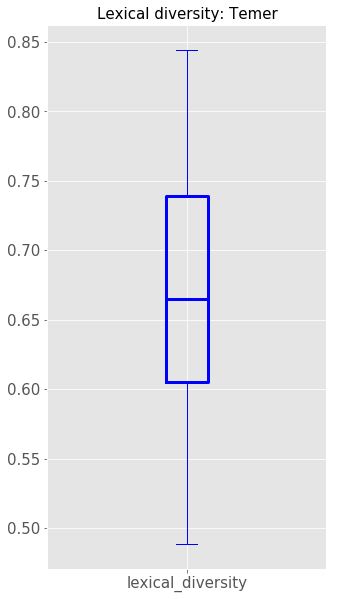

In [40]:
plt.subplot(1,1,1)
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
df_temer_clean['lexical_diversity'].plot.box(color='b', figsize=(5,10),\
                                             boxprops = boxprops, medianprops = medianprops)
plt.title('Lexical diversity: Temer', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

####  A distribuição de diversidade lexical:

/home/kognita/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


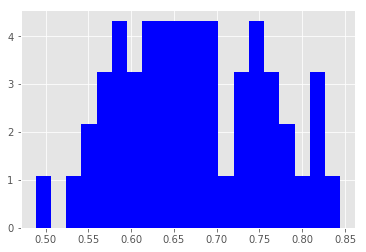

In [41]:
df_temer_clean['lexical_diversity'].hist(normed=1, stacked = True, color = 'b', bins = 20)

#### A diversidade lexical global dos discursos de Temer:


In [42]:
# definindo uma "bag of words" da totalidade dos discursos:
temer_bag = ' '.join(df_temer_clean['clean_text'].tolist()).split()

In [43]:
print temer_bag

['quero', 'cumprimentar', 'todos', 'tomarei', 'liberdade', 'governador', 'prefeito', 'vou', 'tomar', 'liberdade', 'nome', 'ambos', 'cumprimentar', 'todos', 'porque', 'sao', 'tantas', 'autoridades', 'governador', 'dornelles', 'prefeito', 'crivella', 'estao', 'aqui', 'mesa', 'estao', 'auditorio', 'fazer', 'longa', 'relacao', 'digo', 'autoridades', 'nao', 'quero', 'dizer', 'apenas', 'prezados', 'colegas', 'deputados', 'federais', 'estao', 'vida', 'publica', 'estao', 'vida', 'privada', 'voces', 'sabem', 'enaltecido', 'todos', 'momentos', 'presenca', 'iniciativa', 'privada', 'auxilio', 'fenomeno', 'governativo', 'entao', 'falo', 'reitero', 'autoridades', 'referindo', 'ocupam', 'transitoriamente', 'poder', 'publico', 'ocupam', 'permanentemente', 'setor', 'privado', 'aqui', 'primeira', 'afirmacao', 'quero', 'fazer', 'aqui', 'revelar', 'importancia', 'senhor', 'presidente', 'iniciativa', 'senhores', 'levam', 'adiante', 'muita', 'exacao', 'muita', 'competencia', 'portanto', 'ajudando', 'constru

In [44]:
total_lexical_diversity_temer = float(len(set(temer_bag)))/float(len(temer_bag))
print total_lexical_diversity_temer

0.201756503893


#### Portanto, globalmente, a diversidade lexical dos discursos de Temer é de \approx 16%.

#### Criando uma "nuvem de palavras", onde as palavras mais frequentes são destacadas:

In [45]:
def cloud(word_list, title):
    from os import path
    import matplotlib.pyplot as plt

    #d = path.dirname(file_path)

    ### Read the whole text.
    #text = open(path.join(d, text_file)).read()
    text_str = " ".join(str(x) for x in word_list)
    ### Generate a word cloud image
    wordcloud = WordCloud().generate(text_str)



    ### take relative word frequencies into account, lower max_font_size
    #wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
    #wordcloud = WordCloud(width=400, height=200, max_font_size=40, relative_scaling=.5).generate(text)
    wordcloud = WordCloud(width=1600, height=800 , max_font_size=500).generate(text_str)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title, fontsize = 40)
    plt.show()
    #plt.savefig(figout_relative,facecolor='k', bbox_inches='tight')


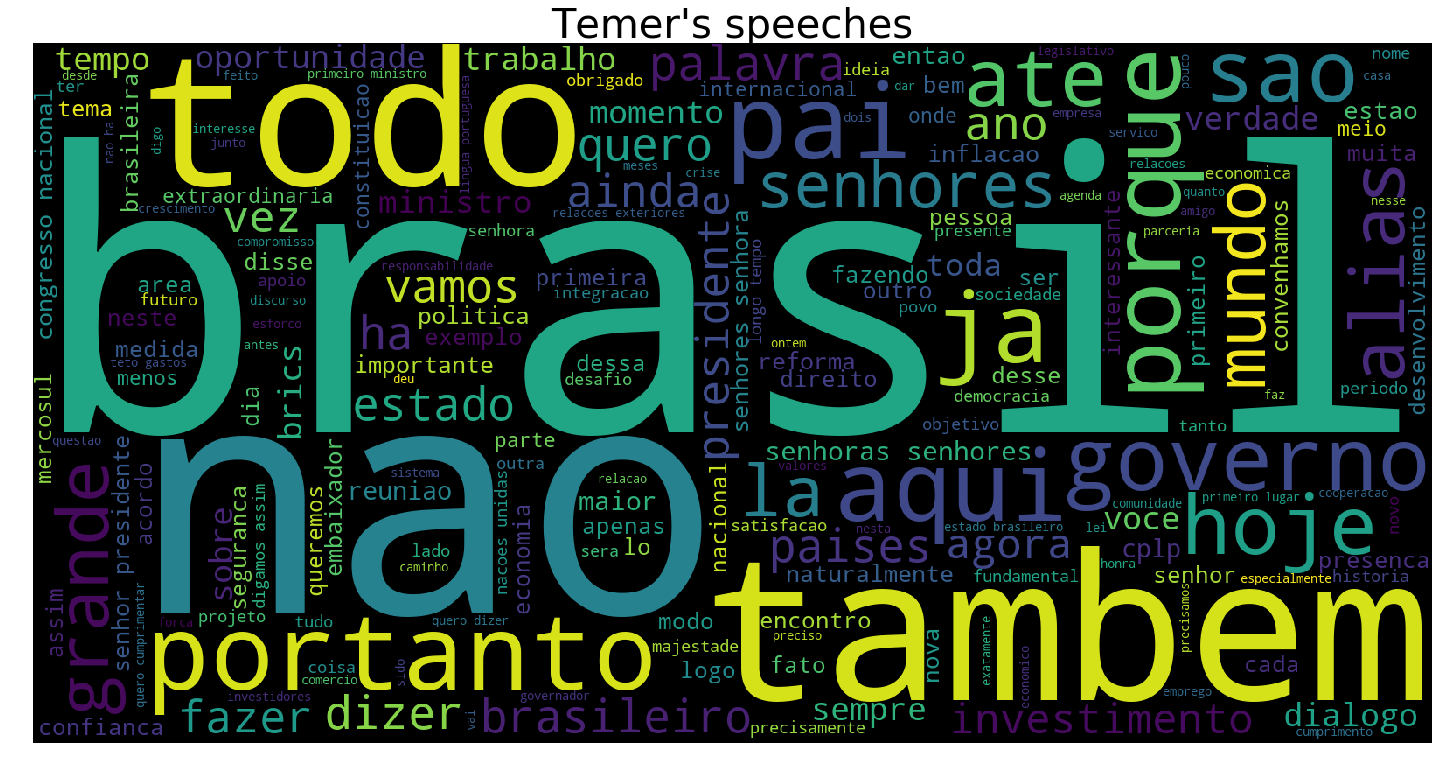

In [46]:
cloud(temer_bag, "Temer's speeches")

#### As palavras mais frequentes nos discursos de Temer:

In [47]:
temer_freqdist = FreqDist(temer_bag).most_common(20)

In [35]:
temer_freqdist

[('nao', 631),
 ('brasil', 592),
 ('senhores', 368),
 ('tambem', 368),
 ('todos', 328),
 ('presidente', 326),
 ('pais', 309),
 ('portanto', 275),
 ('aqui', 269),
 ('ja', 266),
 ('sao', 259),
 ('quero', 259),
 ('porque', 224),
 ('ha', 212),
 ('paises', 209),
 ('governo', 203),
 ('hoje', 197),
 ('dizer', 191),
 ('senhoras', 190),
 ('senhor', 188)]

### Fazendo as mesmas análises para bigramas (pares de palavras):

In [48]:
# bigramas dos discursos de Temer:
temer_bag_big = list(bigrams(temer_bag))

In [49]:
temer_freqdist_bigrams = FreqDist(temer_bag_big).most_common(20)

In [50]:
temer_freqdist_bigrams

[(('senhoras', 'senhores'), 55),
 (('congresso', 'nacional'), 49),
 (('senhor', 'presidente'), 46),
 (('senhores', 'senhoras'), 46),
 (('longo', 'tempo'), 31),
 (('digamos', 'assim'), 30),
 (('nacoes', 'unidas'), 29),
 (('quero', 'dizer'), 28),
 (('primeiro', 'lugar'), 27),
 (('relacoes', 'exteriores'), 26),
 (('primeiro', 'ministro'), 25),
 (('estado', 'brasileiro'), 24),
 (('quero', 'cumprimentar'), 24),
 (('lingua', 'portuguesa'), 24),
 (('nao', 'so'), 24),
 (('nao', 'ha'), 23),
 (('teto', 'gastos'), 23),
 (('meio', 'ambiente'), 22),
 (('presidente', 'macri'), 22),
 (('muitas', 'vezes'), 21)]

#### Definindo uma função que melhora a aparência dos n-gramas e os prepara para plotar:

In [51]:
# enter a freqdist function output and generate 
# a list of more elegant bigrams (word1 + word2) in str format and a list of the corresponding counting
def ngram_converter(freqdist):
    list_bigrams = []
    list_values = []
    for k in xrange(0, len(freqdist)):
        list_bigrams.append(freqdist[k][0])
        list_values.append(freqdist[k][1])
        
    list_bigrams_str = [str(term) for term in list_bigrams]    
    subs = {'(':' ', ')': ' ', ', ': ' + '}
    for k in xrange(0, len(list_bigrams_str)):
        for key, value in subs.iteritems():    
            list_bigrams_str[k] = list_bigrams_str[k].replace(key, value)
    return list_bigrams_str, list_values    

#### Plotando as palavras mais frequentes:

In [52]:
list_words_temer_str, list_wordcount_temer = ngram_converter(temer_freqdist)
print list_wordcount_temer
print ' '
print list_words_temer_str

[428, 389, 257, 242, 222, 200, 197, 197, 194, 184, 177, 169, 160, 149, 147, 147, 145, 137, 135, 119]
 
['nao', 'brasil', 'tambem', 'senhores', 'todos', 'portanto', 'presidente', 'pais', 'aqui', 'quero', 'ja', 'porque', 'sao', 'dizer', 'governo', 'ministro', 'paises', 'ha', 'hoje', 'senhor']


Text(0.5,1,'Top 20 words: Temer')

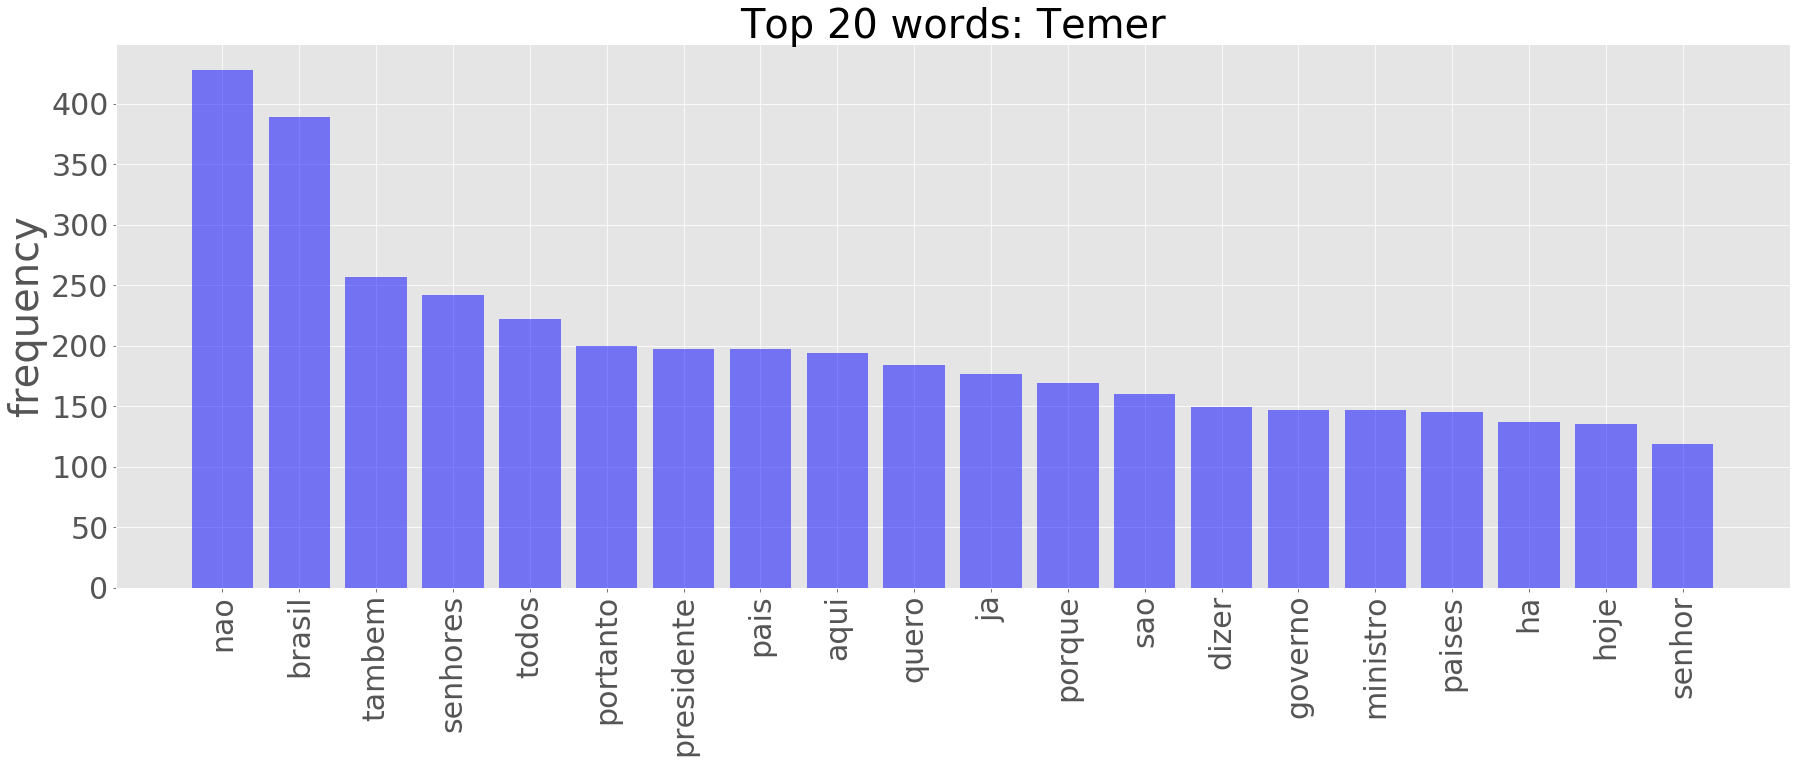

In [53]:
pos = np.arange(len(list_words_temer_str))
plt.figure(figsize=(30,10))
plt.bar(pos, list_wordcount_temer  ,color='b', alpha = 0.5)
plt.xticks(pos, list_words_temer_str, rotation = 90, fontsize = 30)
plt.yticks(fontsize=30)
plt.ylabel('frequency', fontsize=40)
plt.title('Top 20 words: Temer', fontsize=40)

In [54]:
list_bigrams_temer_str, list_wordcount_bigrams_temer = ngram_converter(temer_freqdist_bigrams)

Text(0.5,1,'Top 20 bigrams: Temer')

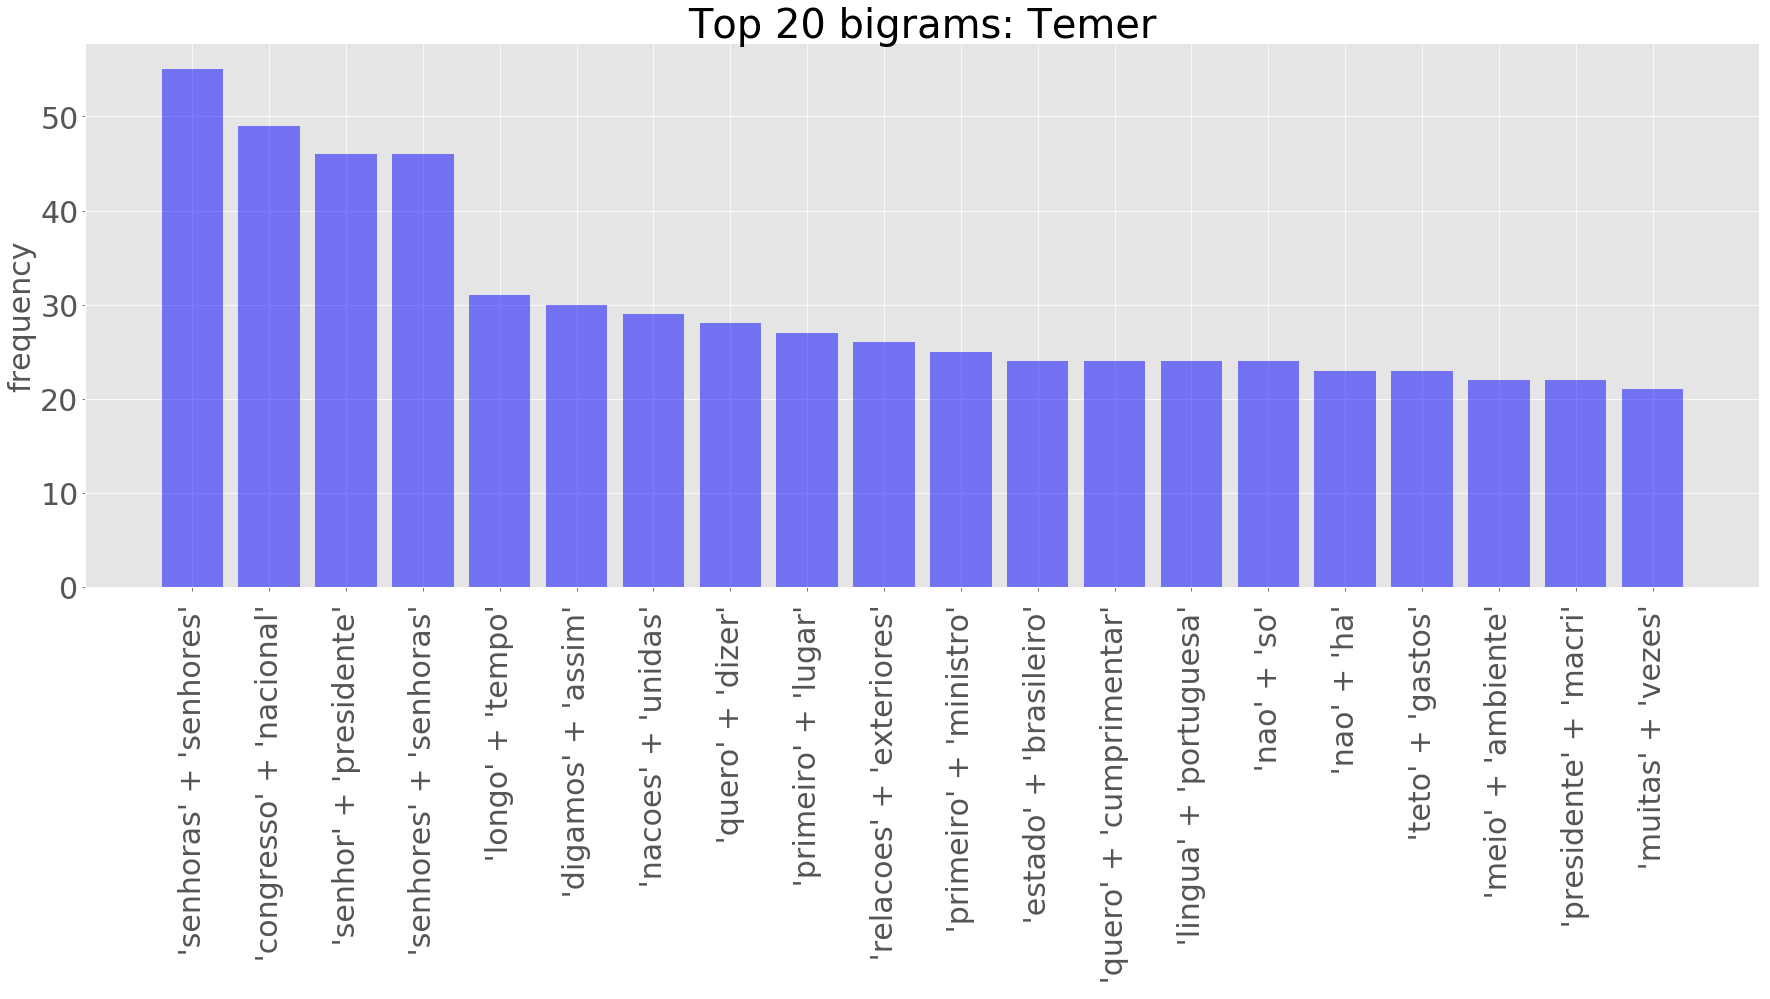

In [55]:
pos = np.arange(len(list_bigrams_temer_str))
plt.figure(figsize=(30,10))
plt.bar(pos, list_wordcount_bigrams_temer  ,color='b', alpha = 0.5)
plt.xticks(pos, list_bigrams_temer_str, rotation = 90, fontsize = 30 )
plt.yticks(fontsize=30)
plt.ylabel('frequency', fontsize=30)
plt.title('Top 20 bigrams: Temer', fontsize=40)

## Dilma

In [56]:
df_dilma_clean

,title,text,president,dates
0,"Discurso da Presidenta da República, Dilma Rou...",Foto: Roberto Stuckert Filho/PRSenhor Carlos A...,Dilma,2016-05-03
1,"Discurso da Presidenta da República, Dilma Rou...",Fotos: Ichiro Guerra/PRSenhor Secretário-Geral...,Dilma,2016-04-22
2,"Discurso da Presidenta da República, Dilma Rou...","Boa tarde a todos,Eu queria dirigir um cumprim...",Dilma,2016-02-26
3,"Pronunciamento da Presidenta da República, Dil...","Brasileiras e brasileiros,Peço licença para en...",Dilma,2016-02-03
4,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Evo Morales, presidente ...",Dilma,2016-02-02
5,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssimo...,Dilma,2016-02-02
6,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Rosen Plevneliev, presid...",Dilma,2016-02-01
7,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert/PR Excelentíssimo senho...,Dilma,2016-02-01
8,"Discurso da Presidenta da República, Dilma Rou...",Queria cumprimentar o senhor presidente Rafael...,Dilma,2016-01-27
9,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssim...,Dilma,2016-01-26


#### Limpando o texto:

In [57]:
dilma_clean_text_list = cleaning(df_dilma_clean['text'])

 
 
eliminating excess of blank space: 
 
0
100
step time:  0.0155987739563
partial total time:  0.015683889389
 
 
 
 
eliminating urls: 
 
0
100
step time:  0.00273513793945
partial total time:  0.0186789035797
 
 
 
 
eliminating more strings... 
 
0
100
step time:  24.3111341
Total time:  24.33157897
 
 


In [46]:
df_dilma_clean['clean_text'] = dilma_clean_text_list

In [47]:
df_dilma_clean

,title,text,president,dates,clean_text
0,"Discurso da Presidenta da República, Dilma Rou...",Foto: Roberto Stuckert Filho/PRSenhor Carlos A...,Dilma,2016-05-03,foto roberto stuckert filho prsenhor carlos ar...
1,"Discurso da Presidenta da República, Dilma Rou...",Fotos: Ichiro Guerra/PRSenhor Secretário-Geral...,Dilma,2016-04-22,fotos ichiro guerra prsenhor secretario geral ...
2,"Discurso da Presidenta da República, Dilma Rou...",Fotos: Ichiro Guerra/PRSenhor Secretário-Geral...,Dilma,2016-04-22,fotos ichiro guerra prsenhor secretario geral ...
3,"Discurso da Presidenta da República, Dilma Rou...","Boa tarde a todos,Eu queria dirigir um cumprim...",Dilma,2016-02-26,boa tarde todos queria dirigir cumprimento tod...
4,"Pronunciamento da Presidenta da República, Dil...","Brasileiras e brasileiros,Peço licença para en...",Dilma,2016-02-03,brasileiras brasileiros peco licenca entrar ca...
5,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Evo Morales, presidente ...",Dilma,2016-02-02,excelentissimo senhor evo morales presidente e...
6,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssimo...,Dilma,2016-02-02,foto roberto stuckert filho pr excelentissimo ...
7,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssimo...,Dilma,2016-02-02,foto roberto stuckert filho pr excelentissimo ...
8,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Rosen Plevneliev, presid...",Dilma,2016-02-01,excelentissimo senhor rosen plevneliev preside...
9,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert/PR Excelentíssimo senho...,Dilma,2016-02-01,foto roberto stuckert pr excelentissimo senhor...


#### Contando também o número de palavras na coluna "clean_text":

In [48]:
df_dilma_clean['word_count'] = df_dilma_clean['clean_text'].str.split().apply(len)

In [49]:
df_dilma_clean

,title,text,president,dates,clean_text,word_count
0,"Discurso da Presidenta da República, Dilma Rou...",Foto: Roberto Stuckert Filho/PRSenhor Carlos A...,Dilma,2016-05-03,foto roberto stuckert filho prsenhor carlos ar...,373
1,"Discurso da Presidenta da República, Dilma Rou...",Fotos: Ichiro Guerra/PRSenhor Secretário-Geral...,Dilma,2016-04-22,fotos ichiro guerra prsenhor secretario geral ...,518
2,"Discurso da Presidenta da República, Dilma Rou...",Fotos: Ichiro Guerra/PRSenhor Secretário-Geral...,Dilma,2016-04-22,fotos ichiro guerra prsenhor secretario geral ...,518
3,"Discurso da Presidenta da República, Dilma Rou...","Boa tarde a todos,Eu queria dirigir um cumprim...",Dilma,2016-02-26,boa tarde todos queria dirigir cumprimento tod...,566
4,"Pronunciamento da Presidenta da República, Dil...","Brasileiras e brasileiros,Peço licença para en...",Dilma,2016-02-03,brasileiras brasileiros peco licenca entrar ca...,425
5,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Evo Morales, presidente ...",Dilma,2016-02-02,excelentissimo senhor evo morales presidente e...,398
6,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssimo...,Dilma,2016-02-02,foto roberto stuckert filho pr excelentissimo ...,453
7,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssimo...,Dilma,2016-02-02,foto roberto stuckert filho pr excelentissimo ...,453
8,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Rosen Plevneliev, presid...",Dilma,2016-02-01,excelentissimo senhor rosen plevneliev preside...,324
9,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert/PR Excelentíssimo senho...,Dilma,2016-02-01,foto roberto stuckert pr excelentissimo senhor...,366


#### Para minimizar ruído de eventuais coletas incompletas de discursos, vamos estabelecer um cutoff nos dataframes nos limitando a discursos com mais de 50 palavras:

In [50]:
df_dilma_clean = df_dilma_clean[df_dilma_clean['word_count'] >= 50].reset_index(drop = True)

#### Criando uma coluna com a contagem de palavras únicas:

In [51]:
df_dilma_clean['unique_word_count'] = df_dilma_clean['clean_text'].str.split().apply(set).apply(len)

#### Definindo a coluna "lexical_diversity":

In [52]:
df_dilma_clean['lexical_diversity'] =\
df_dilma_clean['unique_word_count'].astype(float)/df_dilma_clean['word_count'].astype(float)

In [53]:
df_dilma_clean

,title,text,president,dates,clean_text,word_count,unique_word_count,lexical_diversity
0,"Discurso da Presidenta da República, Dilma Rou...",Foto: Roberto Stuckert Filho/PRSenhor Carlos A...,Dilma,2016-05-03,foto roberto stuckert filho prsenhor carlos ar...,373,249,0.667560
1,"Discurso da Presidenta da República, Dilma Rou...",Fotos: Ichiro Guerra/PRSenhor Secretário-Geral...,Dilma,2016-04-22,fotos ichiro guerra prsenhor secretario geral ...,518,367,0.708494
2,"Discurso da Presidenta da República, Dilma Rou...",Fotos: Ichiro Guerra/PRSenhor Secretário-Geral...,Dilma,2016-04-22,fotos ichiro guerra prsenhor secretario geral ...,518,367,0.708494
3,"Discurso da Presidenta da República, Dilma Rou...","Boa tarde a todos,Eu queria dirigir um cumprim...",Dilma,2016-02-26,boa tarde todos queria dirigir cumprimento tod...,566,378,0.667845
4,"Pronunciamento da Presidenta da República, Dil...","Brasileiras e brasileiros,Peço licença para en...",Dilma,2016-02-03,brasileiras brasileiros peco licenca entrar ca...,425,290,0.682353
5,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Evo Morales, presidente ...",Dilma,2016-02-02,excelentissimo senhor evo morales presidente e...,398,291,0.731156
6,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssimo...,Dilma,2016-02-02,foto roberto stuckert filho pr excelentissimo ...,453,333,0.735099
7,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert Filho/PR Excelentíssimo...,Dilma,2016-02-02,foto roberto stuckert filho pr excelentissimo ...,453,333,0.735099
8,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Rosen Plevneliev, presid...",Dilma,2016-02-01,excelentissimo senhor rosen plevneliev preside...,324,254,0.783951
9,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert/PR Excelentíssimo senho...,Dilma,2016-02-01,foto roberto stuckert pr excelentissimo senhor...,366,283,0.773224


#### Ordenando de forma descrescente em função do valor da coluna "lexical_diversity":

In [54]:
df_dilma_clean.sort_values('lexical_diversity',ascending=False)

,title,text,president,dates,clean_text,word_count,unique_word_count,lexical_diversity
55,"Discurso da Presidenta da República, Dilma Rou...",Cumprimento os ex combatentes condecorados com...,Dilma,2015-05-08,cumprimento ex combatentes condecorados ordem ...,281,227,0.807829
95,"Discurso da Presidenta da República, Dilma Rou...","Senhor José Eduardo dos Santos, presidente da ...",Dilma,2011-10-20,senhor jose eduardo santos presidente republic...,291,234,0.804124
99,"Discurso da Presidenta da República, Dilma Rou...","Senhor Georgi Parvanov, Presidente da Repúblic...",Dilma,2011-10-05,senhor georgi parvanov presidente republica bu...,223,175,0.784753
8,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Rosen Plevneliev, presid...",Dilma,2016-02-01,excelentissimo senhor rosen plevneliev preside...,324,254,0.783951
29,"Discurso da Presidenta da República, Dilma Rou...","Senhor Narendra Modi, primeiro-ministro da Ín...",Dilma,2015-09-26,senhor narendra modi primeiro ministro india s...,173,134,0.774566
9,Declaração à imprensa da Presidenta da Repúbli...,Foto: Roberto Stuckert/PR Excelentíssimo senho...,Dilma,2016-02-01,foto roberto stuckert pr excelentissimo senhor...,366,283,0.773224
51,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo Senhor Li Keqiang, primeiro-min...",Dilma,2015-05-19,excelentissimo senhor li keqiang primeiro mini...,436,336,0.770642
94,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Viktor Yanukovych, presi...",Dilma,2011-10-25,excelentissimo senhor viktor yanukovych presid...,368,282,0.766304
105,"Discurso da Presidenta da República, Dilma Rou...","Excelentíssimo senhor Stephen Harper, primeiro...",Dilma,2011-08-08,excelentissimo senhor stephen harper primeiro ...,425,325,0.764706
35,"Discurso da Presidenta da República, Dilma Rou...","Senhor Thomas Bach, presidente do Comitê Olímp...",Dilma,2015-08-05,senhor thomas bach presidente comite olimpico ...,306,233,0.761438


#### O texto mais "rico" da Dilma:

In [55]:
print df_dilma_clean['text'][55]

Cumprimento os ex combatentes condecorados com a Ordem Nacional do Mérito Roberto Paulo Timponi, Nestor da Silva, João Rodrigues Filho e Melchisedech Afonso de Carvalho, por meio dos quais cumprimento todos os heróis que defenderam o Brasil e os nossos ideais de liberdade e democracia.Senhoras e senhores, chefes de missão diplomática acreditados junto ao meu governo.Ministros de Estado, Aloizio Mercadante, da Casa Civil; tenente brigadeiro do ar Nivaldo Luiz Rossato, interino da Defesa.Embaixador Mauro Vieira, das Relações Exteriores.General de Exército José Elito Carvalho Siqueira, do Gabinete de Segurança Institucional.Há 70 anos, encerrava-se um capítulo trágico da história da humanidade. Após seis anos de conflito, a 2ª Guerra Mundial chegava ao fim na Europa, tendo ceifado dezenas de milhões de vidas, a maioria civis, mas muitos militares.Naquele 8 de maio renascia a esperança de que a liberdade e a paz voltassem a reger a vida entre as nações. Uma vitória extraordinária para a qu

#### Análise descritiva da diversidade lexical:

In [56]:
df_dilma_clean['lexical_diversity'].describe()

count    121.000000
mean       0.667237
std        0.083528
min        0.314396
25%        0.628866
50%        0.684874
75%        0.727858
max        0.807829
Name: lexical_diversity, dtype: float64

####  A distribuição de diversidade lexical:

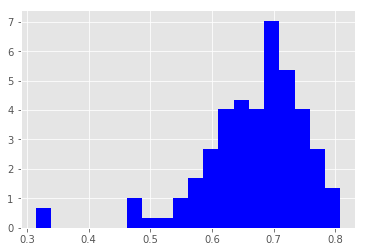

In [57]:
df_dilma_clean['lexical_diversity'].hist(normed=1, stacked = True, color = 'b', bins = 20)

#### A diversidade lexical global dos discursos de Dilma:

In [58]:
# definindo uma "bag of words" da totalidade dos discursos:
dilma_bag = ' '.join(df_dilma_clean['clean_text'].tolist()).split()

In [59]:
print dilma_bag

['foto', 'roberto', 'stuckert', 'filho', 'prsenhor', 'carlos', 'arthur', 'nuzman', 'presidente', 'comite', 'organizador', 'jogos', 'rio', '2016', 'presidente', 'comite', 'olimpico', 'brasileiro', 'senhor', 'julio', 'maglione', 'presidente', 'organizacao', 'desportiva', 'panamericana', 'odepa', 'meio', 'cumprimento', 'todos', 'presidentes', 'comites', 'olimpicos', 'americas', 'nuzman', 'habla', 'espanhol', 'yo', 'portunhol', 'entonces', 'vou', 'falar', 'portugues', 'nao', 'prejudicar', 'lingua', 'espanhola', 'queria', 'cumprimentar', 'tambem', 'ministro', 'interino', 'esporte', 'ricardo', 'leyser', 'ministro', 'gabinete', 'pessoal', 'jaques', 'wagner', 'queria', 'cumprimentar', 'agradecer', 'recepcao', 'comandantes', 'militares', 'general', 'exercito', 'eduardo', 'villas', 'boas', 'recebe', 'aqui', 'forte', 'caxias', 'almirante', 'esquadra', 'eduardo', 'leal', 'ferreira', 'marinha', 'tenente', 'brigadeiro', 'ar', 'nivaldo', 'rossato', 'aeronautica', 'saudo', 'todos', 'oficiais', 'soldad

In [60]:
total_lexical_diversity_dilma = float(len(set(dilma_bag)))/float(len(dilma_bag))
print total_lexical_diversity_dilma

0.113600013908


#### Portanto, globalmente, a diversidade lexical dos discursos de Dilma é de \approx 11%.

#### Nuvem de palavras:

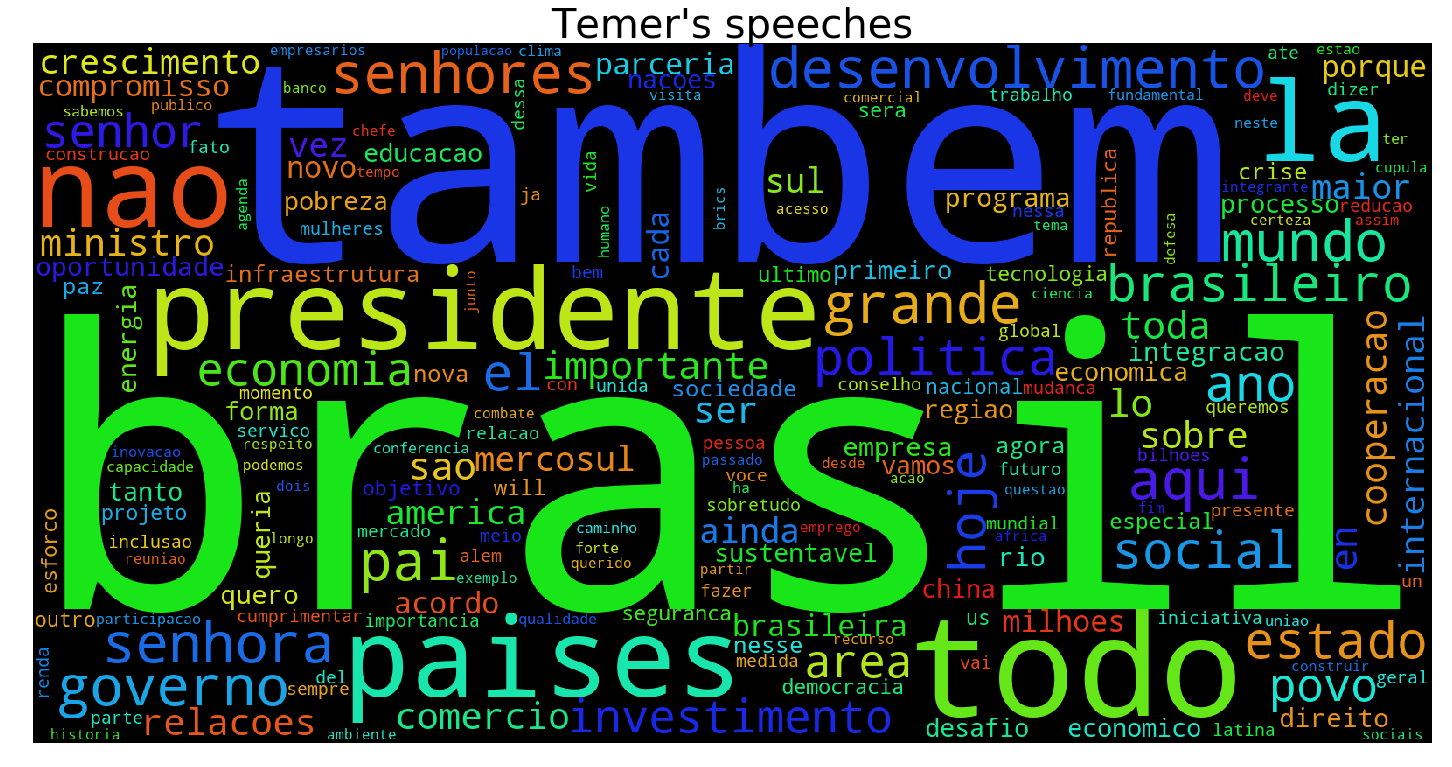

In [61]:
cloud(dilma_bag, "Temer's speeches")

#### As palavras mais frequentes nos discursos de Dilma:

In [62]:
dilma_freqdist = FreqDist(dilma_bag).most_common(20)

In [63]:
dilma_freqdist

[('brasil', 1202),
 ('the', 1008),
 ('tambem', 839),
 ('paises', 662),
 ('and', 644),
 ('of', 642),
 ('nao', 634),
 ('presidente', 618),
 ('desenvolvimento', 549),
 ('todos', 547),
 ('mundo', 522),
 ('to', 520),
 ('senhores', 501),
 ('la', 489),
 ('pais', 483),
 ('y', 465),
 ('senhoras', 404),
 ('aqui', 404),
 ('hoje', 378),
 ('social', 370)]

In [64]:
list_words_dilma_str, list_wordcount_dilma = ngram_converter(dilma_freqdist)
print list_wordcount_dilma
print ' '
print list_words_dilma_str

[1202, 1008, 839, 662, 644, 642, 634, 618, 549, 547, 522, 520, 501, 489, 483, 465, 404, 404, 378, 370]
 
['brasil', 'the', 'tambem', 'paises', 'and', 'of', 'nao', 'presidente', 'desenvolvimento', 'todos', 'mundo', 'to', 'senhores', 'la', 'pais', 'y', 'senhoras', 'aqui', 'hoje', 'social']


Text(0.5,1,'Top 20 words: Dilma')

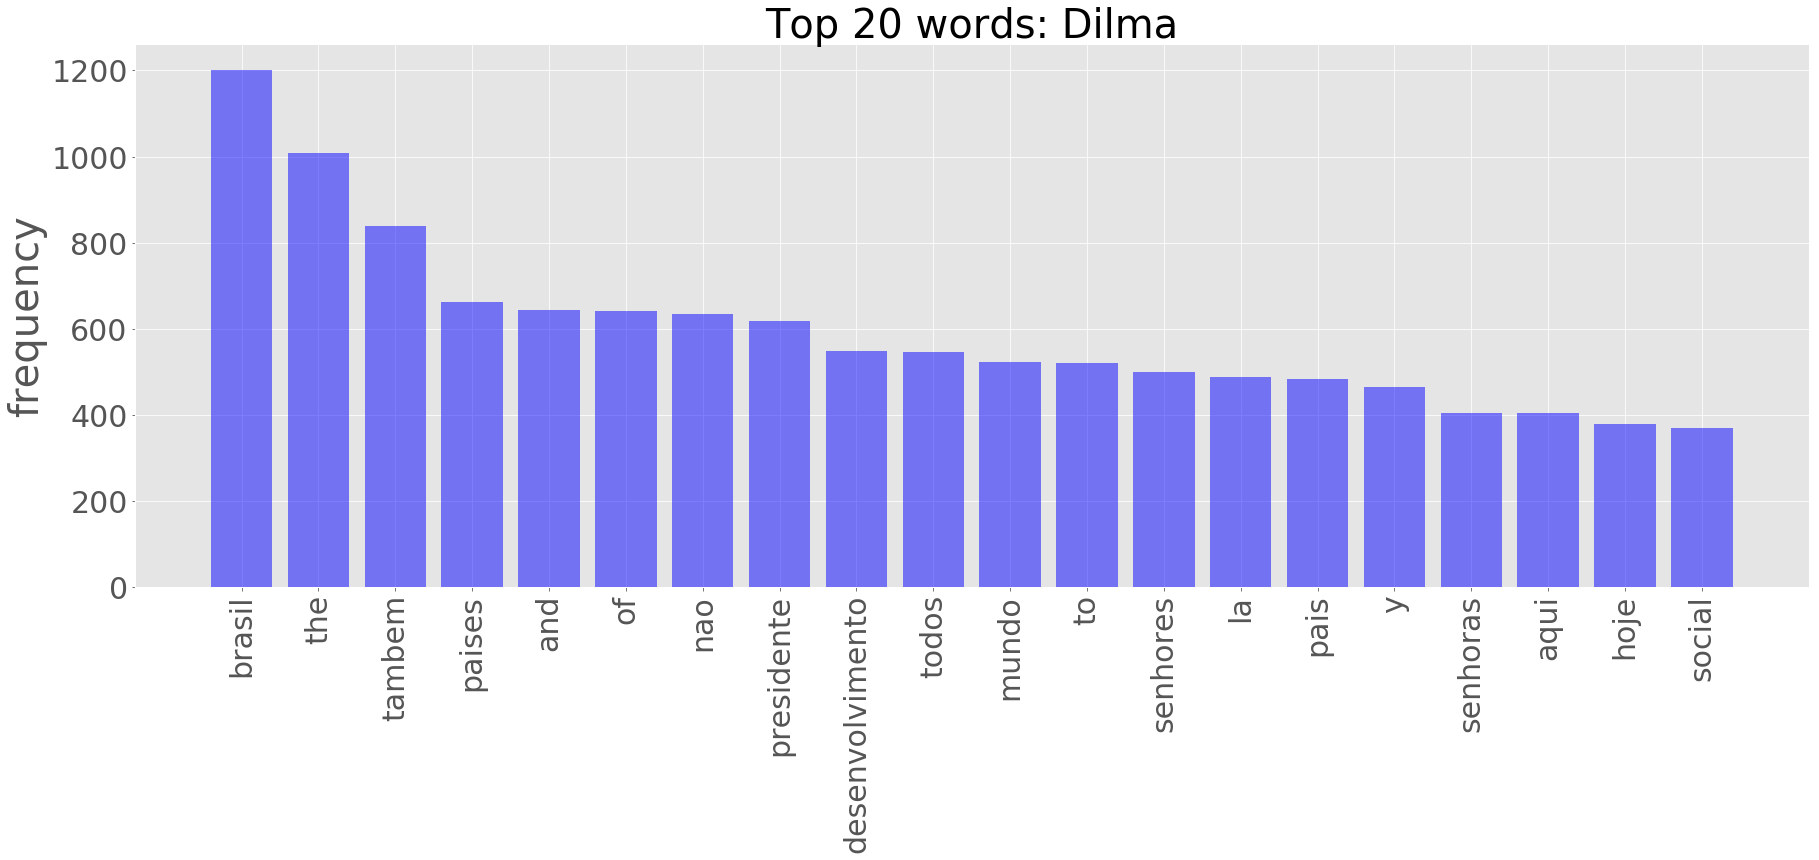

In [65]:
pos = np.arange(len(list_words_dilma_str))
plt.figure(figsize=(30,10))
plt.bar(pos, list_wordcount_dilma  ,color='b', alpha = 0.5)
plt.xticks(pos, list_words_dilma_str, rotation = 90, fontsize = 30)
plt.yticks(fontsize=30)
plt.ylabel('frequency', fontsize=40)
plt.title('Top 20 words: Dilma', fontsize=40)

### Fazendo as mesmas análises para bigramas (pares de palavras):

In [66]:
# bigramas dos discursos de Dilma:
dilma_bag_big = list(bigrams(dilma_bag))

In [67]:
dilma_freqdist_bigrams = FreqDist(dilma_bag_big).most_common(20)

In [68]:
dilma_freqdist_bigrams

[(('senhoras', 'senhores'), 363),
 (('of', 'the'), 134),
 (('desenvolvimento', 'sustentavel'), 122),
 (('nacoes', 'unidas'), 121),
 (('cada', 'vez'), 110),
 (('america', 'latina'), 110),
 (('senhor', 'presidente'), 109),
 (('inclusao', 'social'), 103),
 (('america', 'sul'), 87),
 (('in', 'the'), 80),
 (('presidente', 'republica'), 79),
 (('mudanca', 'clima'), 79),
 (('primeiro', 'ministro'), 77),
 (('estados', 'unidos'), 72),
 (('ultimos', 'anos'), 69),
 (('uniao', 'europeia'), 66),
 (('direitos', 'humanos'), 64),
 (('chefes', 'estado'), 63),
 (('nao', 'so'), 62),
 (('povo', 'brasileiro'), 62)]

In [69]:
list_bigrams_dilma_str, list_wordcount_bigrams_dilma = ngram_converter(dilma_freqdist_bigrams)

Text(0.5,1,'Top 20 bigrams: Dilma')

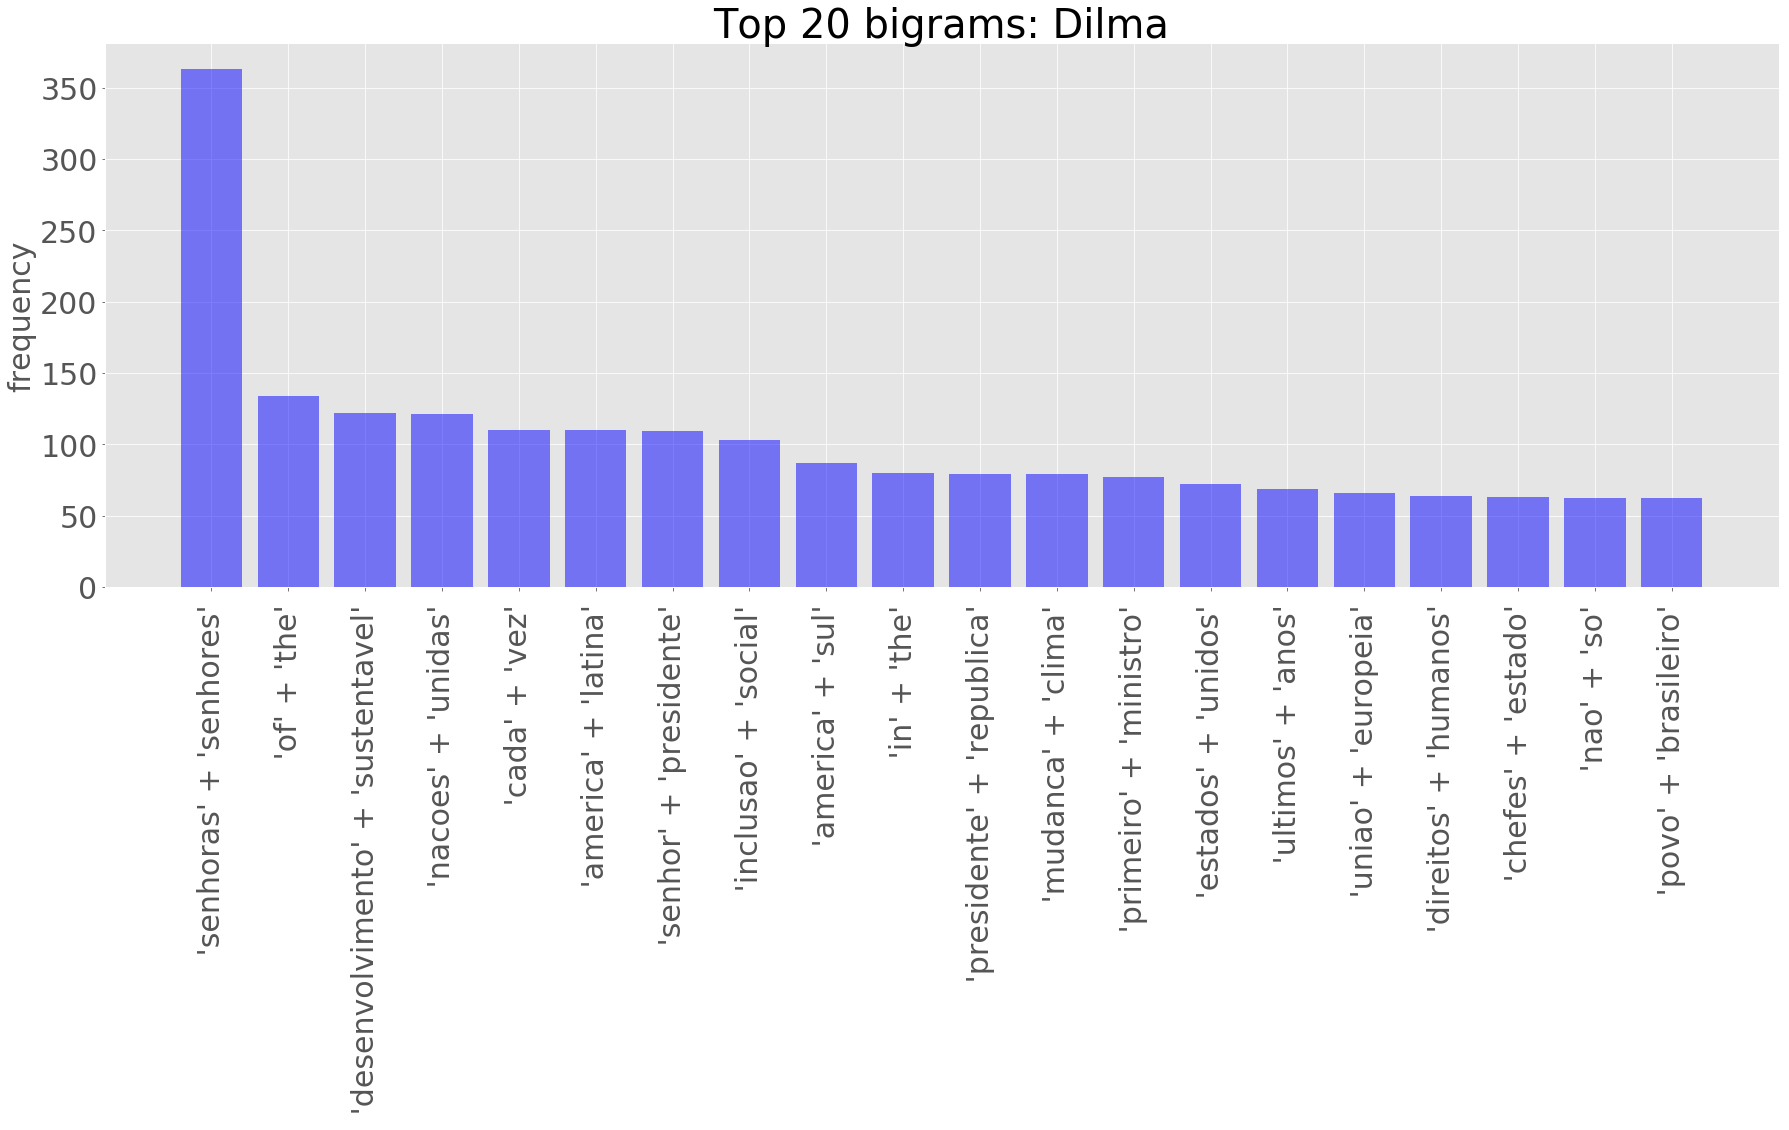

In [70]:
pos = np.arange(len(list_bigrams_dilma_str))
plt.figure(figsize=(30,10))
plt.bar(pos, list_wordcount_bigrams_dilma  ,color='b', alpha = 0.5)
plt.xticks(pos, list_bigrams_dilma_str, rotation = 90, fontsize = 30 )
plt.yticks(fontsize=30)
plt.ylabel('frequency', fontsize=30)
plt.title('Top 20 bigrams: Dilma', fontsize=40)

### <font color='red'> Exercício: repita a análise para os discursos do Lula  </font>

## Questão: a frequência de palavras é a melhor medida para determinar as palavras mais relevante de um conjunto de textos (corpus)?

#### TF-IDF

In [74]:
#
# This function creates a representative document composed by the most representative words of the
# corpus, based on the tf-idf analysis
#
def representative(input_dataframe, nwords):

    # definition of the corpus
    text_corpus = input_dataframe['clean_text'].tolist()
    
    # vectorizing the corpus
    cvec = CountVectorizer()
    cvec.fit(text_corpus)
    
    
    # counting the words in each document
    cvec_counts = cvec.transform(text_corpus)
    
    # computing the df-idf matrix
    transformer = TfidfTransformer()
    transformed_weights = transformer.fit_transform(cvec_counts)
    weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
    
    # sending the results to a pandas dataframe
    df_weights = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
    
    # getting the top n = nwords words:
    df_top_tfidf = df_weights.sort_values(by='weight', ascending=False).head(nwords).reset_index(drop=True)
    
    #finally, the representative document:
    representative_doc =  ' '.join(df_top_tfidf['term'].tolist())
    
    return representative_doc, df_top_tfidf

#### Exemplo: usando o dataframe dos discursos do Temer:

In [82]:
df_tfidf_temer = representative(df_temer_clean, 20)[1]

In [83]:
df_tfidf_temer

,term,weight
0,brasil,0.079388
1,nao,0.073488
2,presidente,0.052792
3,tambem,0.048946
4,senhores,0.048737
5,todos,0.044277
6,pais,0.044087
7,brics,0.043310
8,aqui,0.040261
9,portanto,0.039196


#### Comparando com a contagem de palavras:

In [84]:
temer_freqdist

[('nao', 631),
 ('brasil', 592),
 ('senhores', 368),
 ('tambem', 368),
 ('todos', 328),
 ('presidente', 326),
 ('pais', 309),
 ('portanto', 275),
 ('aqui', 269),
 ('ja', 266),
 ('sao', 259),
 ('quero', 259),
 ('porque', 224),
 ('ha', 212),
 ('paises', 209),
 ('governo', 203),
 ('hoje', 197),
 ('dizer', 191),
 ('senhoras', 190),
 ('senhor', 188)]